In [2]:
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt
import os

RUNNING MEAN,SD,SNR, etc.

In [4]:
filename = 'emodat-Copy1.mat'
n = 1000000
n1=0
file = scipy.io.loadmat(filename)
x = file['data']
x = x[0]
sum = 0
sumsquares = 0
mean = 0
variance = 0
rms = 0
for i in range(0,n):
    n1=(n1) + 1
    sum = sum + x[i]
    sumsquares = sumsquares + (x[i]**2)
    mean = sum/n1
    variance = (sumsquares - (sum**2/n1))/(n1)
    SD = np.sqrt(variance)
rms = np.sqrt(sumsquares/n)
SNR = mean/SD
CV = SD/mean


mean:-11.441599150659473
variance:1680.341051207319
SD:40.99196325143892
rms:42.55879747281037
SNR:-0.279118106163355
CV:-3.5827127582140665


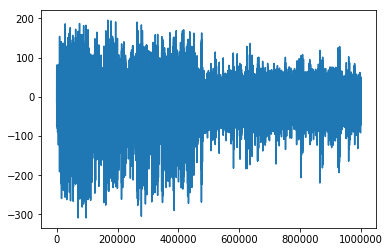

In [5]:
plt.plot(x[0:n])
print('mean:{0}\nvariance:{1}\nSD:{2}\nrms:{3}\nSNR:{4}\nCV:{5}'.format(mean,variance,SD,rms,SNR,CV))

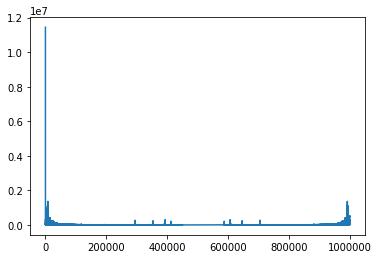

In [4]:
xfft = np.fft.fft(x[0:n]);
plt.plot(np.absolute(xfft));
# need a frequency reference table for Discrete Fourier

HISTOGRAM:

505


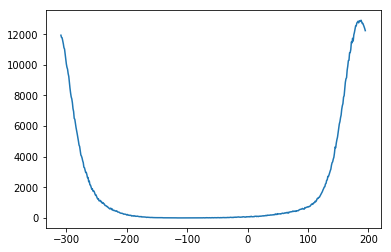

In [5]:
xr = np.rint(x[0:n])
max = np.amax(xr)
min = np.amin(xr)
hist_x = np.arange(min,max+1,1)
hist_y = np.zeros(int(max-min)+1)
for i in range(0,n):
    hist_y[int(xr[i])]=hist_y[int(xr[i])]+1

plt.plot(hist_x,hist_y)
print(len(hist_x))

In [6]:
histsum = 0
histmean = 0
histvar = 0    
for i in range(0,len(hist_y)):
    histsum = histsum + (hist_x[i])*(hist_y[i])
histmean = histsum/n
for i in range(0,len(hist_y)):
    histvar = histvar + (hist_y[i])*(hist_x[i]-histmean)**2
histvar = histvar/(n-1)
histSD = np.sqrt(histvar)
histSNR = histmean/histSD
histCV = histSD/histmean
print('histmean:{0}\nhistvar:{1}\nhistSD:{2}\nhistSNR:{3}\nhistCV:{4}'.format(histmean,histvar,histSD,histSNR,histCV))

histmean:-6.384109
histvar:47570.56580784192
histSD:218.1067761621402
histSNR:-0.029270566977956082
histCV:-34.16401194937934
